# Hyrax Demonstration

For this demonstration we'll walk through a simplified version of a typical machine learning workflow supported by Hyrax.

In [1]:
import hyrax
import pooch  # We'll use this to retrieve some example Hyper Suprime Cam data from Zenodo
import numpy as np

## Download a sample HSC dataset

In [2]:
file_path = pooch.retrieve(
    # DOI for Example HSC dataset
    url="doi:10.5281/zenodo.14498536/hsc_demo_data.zip",
    known_hash="md5:1be05a6b49505054de441a7262a09671",
    fname="example_hsc_new.zip",
    path="../../data",
    processor=pooch.Unzip(extract_dir="."),
)

This dataset is comprised of approximately 993 cutouts from the Hyper Suprime Cam survey.
Each cutout includes i, r and g bands and is 8 arcseconds on a side.


## Create and configure a Hyrax object

In [3]:
h = hyrax.Hyrax()

[2025-05-07 10:56:33,794 hyrax:INFO] Runtime Config read from: /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


An instance of the `Hyrax` class will be used through out this demo.
Under the hood when it is created, it will:
-  Load the configuration file specified (here it's using the built in default).
-  Parse the configuration file for external libraries and add those to the appropriate registries.
-  Prepare logging for the system.

In [4]:
# Specify the location of the data to use for training
h.config["general"]["data_dir"] = "../../data/hsc_8asec_1000"

# Specify the dataset class that represents the data
h.config["data_set"]["name"] = "HSCDataSet"
h.config["data_set"]["train_size"] = 0.8
h.config["data_set"]["validate_size"] = 0.2
h.config["data_set"]["test_size"] = 0.0

# Select the model to use for training
h.config["model"]["name"] = "HyraxAutoencoder"

# Set the number of epochs and batch size for training.
h.config["train"]["epochs"] = 20
h.config["data_loader"]["batch_size"] = 32

The default configuration needs a few tweaks to work for this demo.
We've updated the location of our sample data, and specified which model we want to train.

The configuration is represented as nested python dictionary. This allows for easy manipulation in a notebook via the `.config` attribute of the hyrax instance.

## Train a model

In [5]:
h.train()

[2025-05-07 10:56:33,942 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:56:33,945 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:56:33,961 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning
[2025-05-07 10:56:33,962 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-05-07 10:56:34,399 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
2025-05-07 10:56:34,503 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hsc': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7efc79a6c2c0>, 'batch_size': 32, 'shuffle': False, 'pin_memory': True}
2025-05-07 10:56:34,508 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hsc': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSam

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

  4%|4         | 1/25 [00:00<?, ?it/s]

[2025-05-07 10:57:02,553 hyrax.pytorch_ignite:INFO] Total training time: 26.49[s]
[2025-05-07 10:57:02,554 hyrax.pytorch_ignite:INFO] Latest checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250507-105633-train-jElX/checkpoint_epoch_20.pt
[2025-05-07 10:57:02,555 hyrax.pytorch_ignite:INFO] Best metric checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250507-105633-train-jElX/checkpoint_18_loss=-182.9747.pt
2025/05/07 10:57:02 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/05/07 10:57:02 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-05-07 10:57:02,575 hyrax.train:INFO] Finished Training
[2025-05-07 10:57:02,733 hyrax.model_exporters:INFO] Exported model to ONNX format: /home/drew/code/hyrax/docs/pre_executed/results/20250507-105633-train-jElX/example_model_opset_20.onnx


When we call `.train()` to train the model there's a lot going on under the hood:
- The model is automatically loaded onto the fastest hardware available.
- A data loader is instantiated and configured to load batches of data to the same hardware.
- A new timestamped directory is created under the configured results directory where all output is saved.
- The configuration becomes immutable and a copy is saved for reproducibility.
- The model and system metrics start being logged for review in both TensorBoard and MLFlow.
- Checkpoints are saved automatically both at the last epoch and at the epoch with the lowest loss value.
- Finally the model weights file is saved.

Training time depends heavily on the hardware available, model, and training parameters.
For a point of reference training takes about 40s for this case:
- Model trained: Hyrax autoencoder
- Dataset and size: Example HSC data, 993 samples, 96x96 pixel cutouts
- Number of epochs: 20
- Batch size: 32
- Hardware: Desktop with GTX 1660 Super GPU

While we train on only about 1000 samples here, Hyrax training has scaled up to over 1M samples on an HPC system with access to multiple GPUs without requiring the user to make any code changes.
To do so, the command line interface of Hyrax was used to work within a Slurm environment like so:
```
>> hyrax train --runtime-config ./results/<timestamped_directory>/runtime_config.toml
```

## Run inference

In [6]:
# Update the data set splits to be 100% test data
h.config["data_set"]["test_size"] = 1.0
h.config["data_set"]["train_size"] = 0.0
h.config["data_set"]["validate_size"] = 0.0

# Increase batch size for faster inference
h.config["data_loader"]["batch_size"] = 512

# Run inference
h.infer()

[2025-05-07 10:57:02,782 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:02,786 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:02,802 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning
[2025-05-07 10:57:02,803 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-05-07 10:57:03,160 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
[2025-05-07 10:57:03,164 hyrax.verbs.infer:INFO] data set has length 993
2025-05-07 10:57:03,168 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hsc': 
	{'sampler': None, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
[2025-05-07 10:57:03,263 hyrax.verbs.infer:INFO] Saving inference results at: /home/drew/code/hyrax/docs/pre_executed/results/20250507-105702-infer-pk01
[2025-05-07 10:57:03,644

 50%|#####     | 1/2 [00:00<?, ?it/s]

[2025-05-07 10:57:15,369 hyrax.data_sets.fits_image_dataset:INFO] Processed 992 objects
[2025-05-07 10:57:15,995 hyrax.pytorch_ignite:INFO] Total evaluation time: 12.35[s]
[2025-05-07 10:57:16,042 hyrax.verbs.infer:INFO] Inference Complete.
[2025-05-07 10:57:16,074 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:16,075 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:20,286 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-07 10:57:20,316 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:20,319 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:20,337 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


For this demo, we'll pretend that of all the models we trained, the last one performed best.
We'll now use that model to run inference.
Note that by default, Hyrax will find the weights of the last successfully trained model for inference, but of course, a different set of weights can be specified in the configuration.

First we make a small update to the data set splits, setting `test_size` to 100% and the other splits to 0%.
We also increase the batch size in order to make better use of the available GPU memory.

Finally we run inference over the dataset using the trained model weights with `h.infer()`.
As with training, Hyrax is doing a lot behind the scenes on behalf of the user including:
- Identifying and using the most performant hardware available.
- Creating a new timestamped directory where all output is saved.
- Freezing the configuration and saving a copy for reproducibility.
- Saving the results of inference in batched .npy files.
- Optionally persisting the results to a vector database.

Again, while predicting the latent space for only 1000 samples here, Hyrax inference has scaled up to over 1M samples on an HPC system with access to multiple GPUs without requiring any code changes.

## Examine an embedding

In [7]:
h.umap()

[2025-05-07 10:57:20,369 hyrax.data_sets.inference_dataset:INFO] Using most recent results dir /home/drew/code/hyrax/docs/pre_executed/results/20250507-105702-infer-pk01 for lookup. Use the [results] inference_dir config to set a directory or pass it to this verb.
[2025-05-07 10:57:20,402 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:20,403 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:20,403 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-07 10:57:20,434 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:20,437 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:20,453 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning
[2025-05-07 10:57:20,454 hyrax.verbs.umap:INFO] Saving UMAP results to /home/drew/code/hyrax/docs/pre_executed/results/20250507-10572

Creating lower dimensional representation using UMAP::   0%|          | 0/2 [00:00<?, ?it/s]

[2025-05-07 10:57:29,851 hyrax.verbs.umap:INFO] Finished transforming all data through UMAP
[2025-05-07 10:57:29,886 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:29,886 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:29,887 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-07 10:57:29,918 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:29,921 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:29,937 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


Here we are using the output of the latest inference run to inform a UMAP fitter and then plot the resulting lower dimensional space.
With only about 1000 samples, it's hard to visually identify obvious groupings in the 2D space.

While fitting and transforming is made fairly straightforward with the `umap-learn` API, additional data plumbing is provided by FIBAD.
We ensure that file output of the inference step allows for efficient fitting and transformation with UMAP and all of the data plumbing to read from inference and write results is taken care of.

To support further exploration of the embedding space, FIBAD includes an early implementation of an interactive visualization tool.

## Interactive visualization

[2025-05-07 10:57:32,914 hyrax.data_sets.inference_dataset:INFO] Using most recent results dir /home/drew/code/hyrax/docs/pre_executed/results/20250507-105720-umap-b5tW for lookup. Use the [results] inference_dir config to set a directory or pass it to this verb.
[2025-05-07 10:57:32,947 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:32,948 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:32,948 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-07 10:57:32,978 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:32,981 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:32,997 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
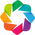

In [8]:
h.config["visualize"]["fields"] = ["ra", "dec"]
viz = h.visualize(width=1000, height=1000)

The Hyrax visualization tooling utilizes Holoviews, Datashader as well as an efficient tree structure to be able to display millions of points.
It allows for panning, zooming as well as lasso and box selections.
When selecting points, the resulting object ids are displayed are displayed in the associated table.

While this is an early version of interactive visualization, it has been scaled up to millions of data points.
The next steps for this tooling will be to support deeper interactivity, namely:
-  Automatically displaying the object selected in the table
-  Leveraging the vector db to identify similar objects
-  Supporting three dimensional UMAP output


This visualization runs in a notebook but when rendered to HTML (for demonstration or documentation) the server backing the interactive visual isn't packaged with the rendering. If the cell above was run locally, the resulting UI would look similar to the following screen shot.

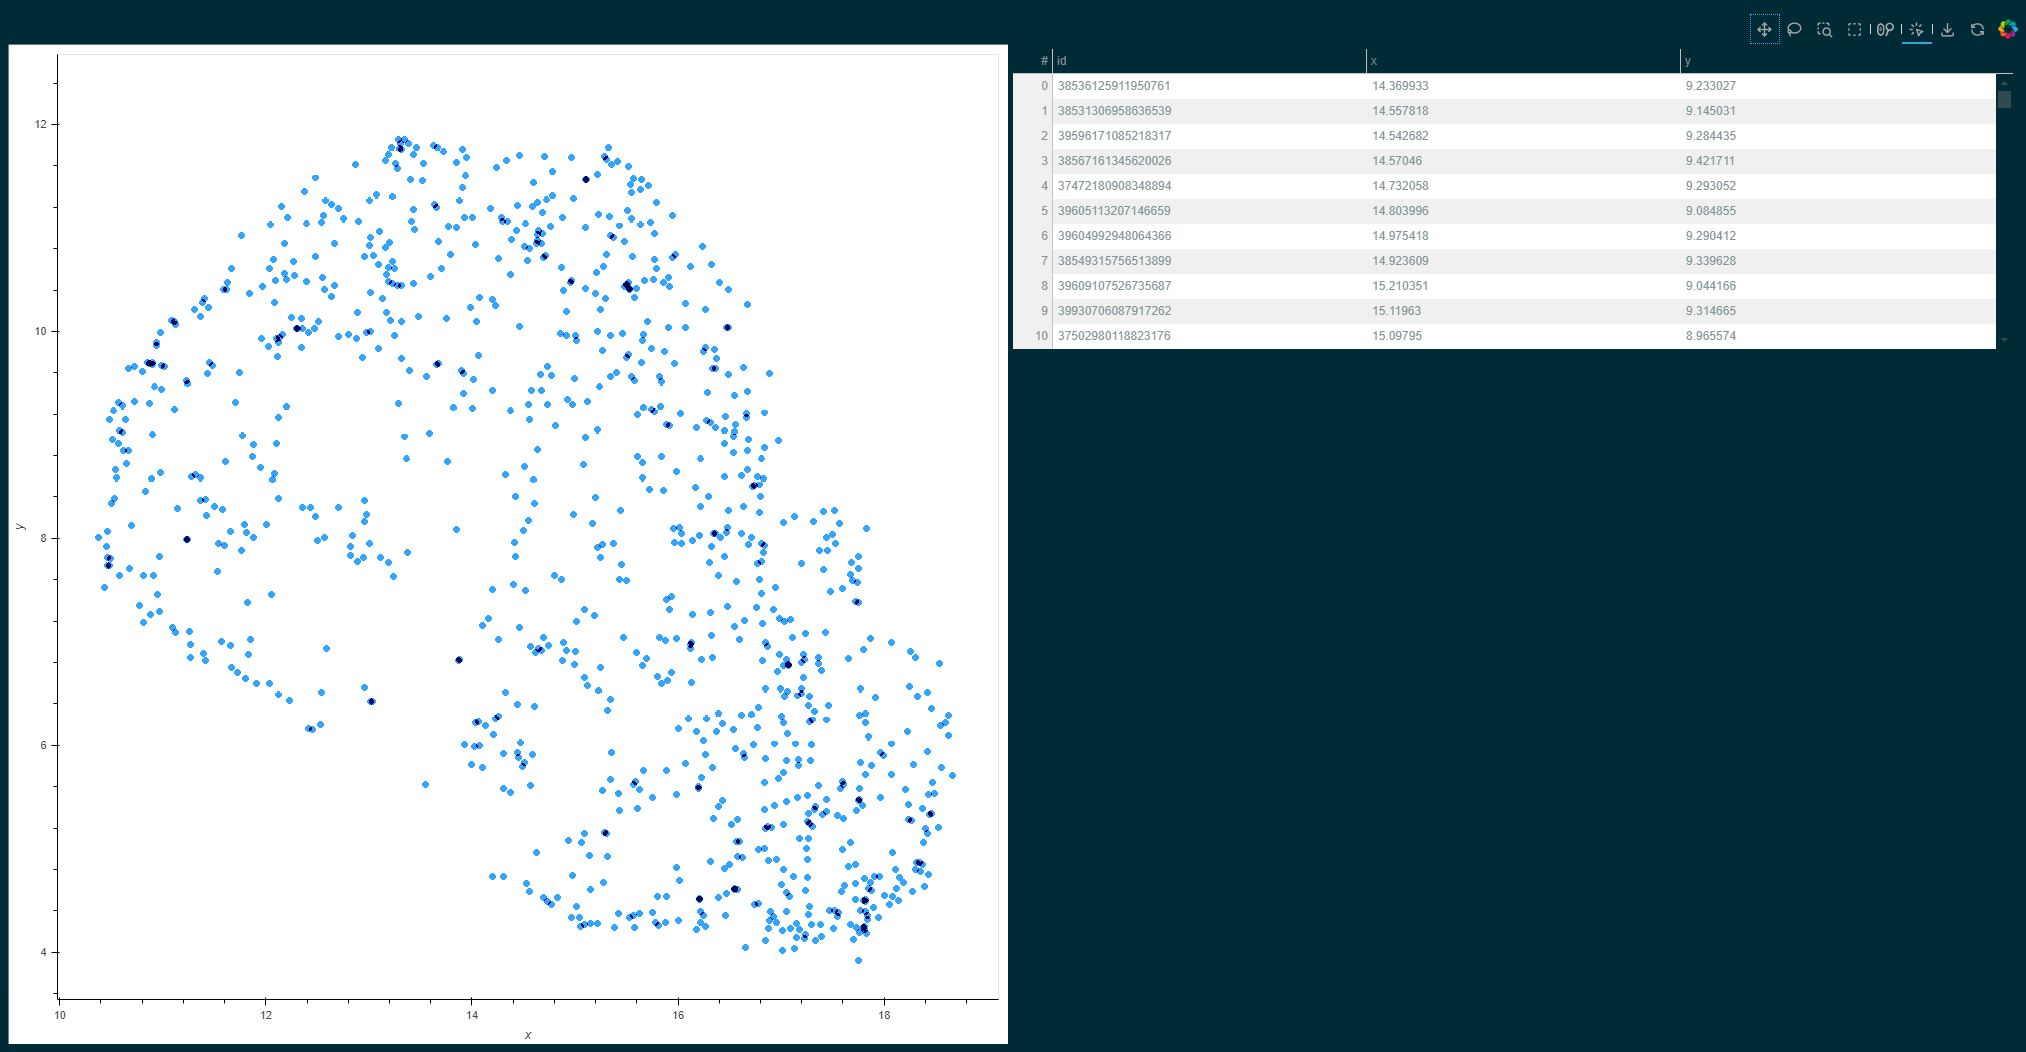


## Create a vector database
By calling the `index` verb, we can populate a vector database with the results of inference. This vector database can be used for efficient similarity or nearest neighbor searches.

In [9]:
h.index()

[2025-05-07 10:57:34,082 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:34,083 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-07 10:57:34,083 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-07 10:57:34,113 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:34,115 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:34,131 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning
[2025-05-07 10:57:34,314 hyrax.verbs.vdb_index:INFO] Number of inference result batches to index: 2.
100%|██████████| 2/2 [00:00<00:00, 12.20it/s]


## Perform a similarity search

To search for objects that are similar to a given object, we can exploit the efficiency of the vector database that was just created. Here, we create an instance of a ChromaDB object that connects to the database that was just created.

In [10]:
from hyrax.vector_dbs import ChromaDB
from hyrax.config_utils import find_most_recent_results_dir

context = {"results_dir": find_most_recent_results_dir(h.config, "index")}
db = ChromaDB({}, context)

With an object id, we can search for k nearest neighbors. In this case, we randomly select an object id, and request the 5 nearest neighbors.

Note: Because the randomly selected object id _is in_ the database the closest "neighbor" is the object itself. Thus the nearest neighbor that is not the original object, is the second element in the returned list.

Note: The ids of the neighbors are returned in order of increasing distance.

In [11]:
search_object_id = "36412406317975358"
search_results = db.search_by_id(search_object_id, k=5)
print(search_results)

{0: ['36412406317975358', '36438262021098771', '37489369367447921', '39913401664672536', '39627103439686867']}


## Display the objects
Let's check that the nearest neighbor seems reasonable. We'll plot the original object, and then the nearest neighbors for visual comparison. To plot the images we'll need to get some information from our dataset.

Using the `prepare` verb to return an instance of the dataset, we can get the list of object ids.

In [12]:
hsc_dataset = h.prepare()
all_ids = list(hsc_dataset.ids())

[2025-05-07 10:57:34,567 hyrax.data_sets.hsc_data_set:INFO] Checking file dimensions to determine standard cutout size...
[2025-05-07 10:57:34,570 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 993 objects
[2025-05-07 10:57:34,585 hyrax.data_sets.hsc_data_set:INFO] Processed 993 objects for pruning
[2025-05-07 10:57:34,586 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-05-07 10:57:34,588 hyrax.prepare:INFO] Finished Prepare


[2025-05-07 10:57:46,942 hyrax.data_sets.fits_image_dataset:INFO] Processed 992 objects


We can use the ids from the `hsc_dataset` object to get the dataset index of the object ids returned from the vector database query, and plot those.

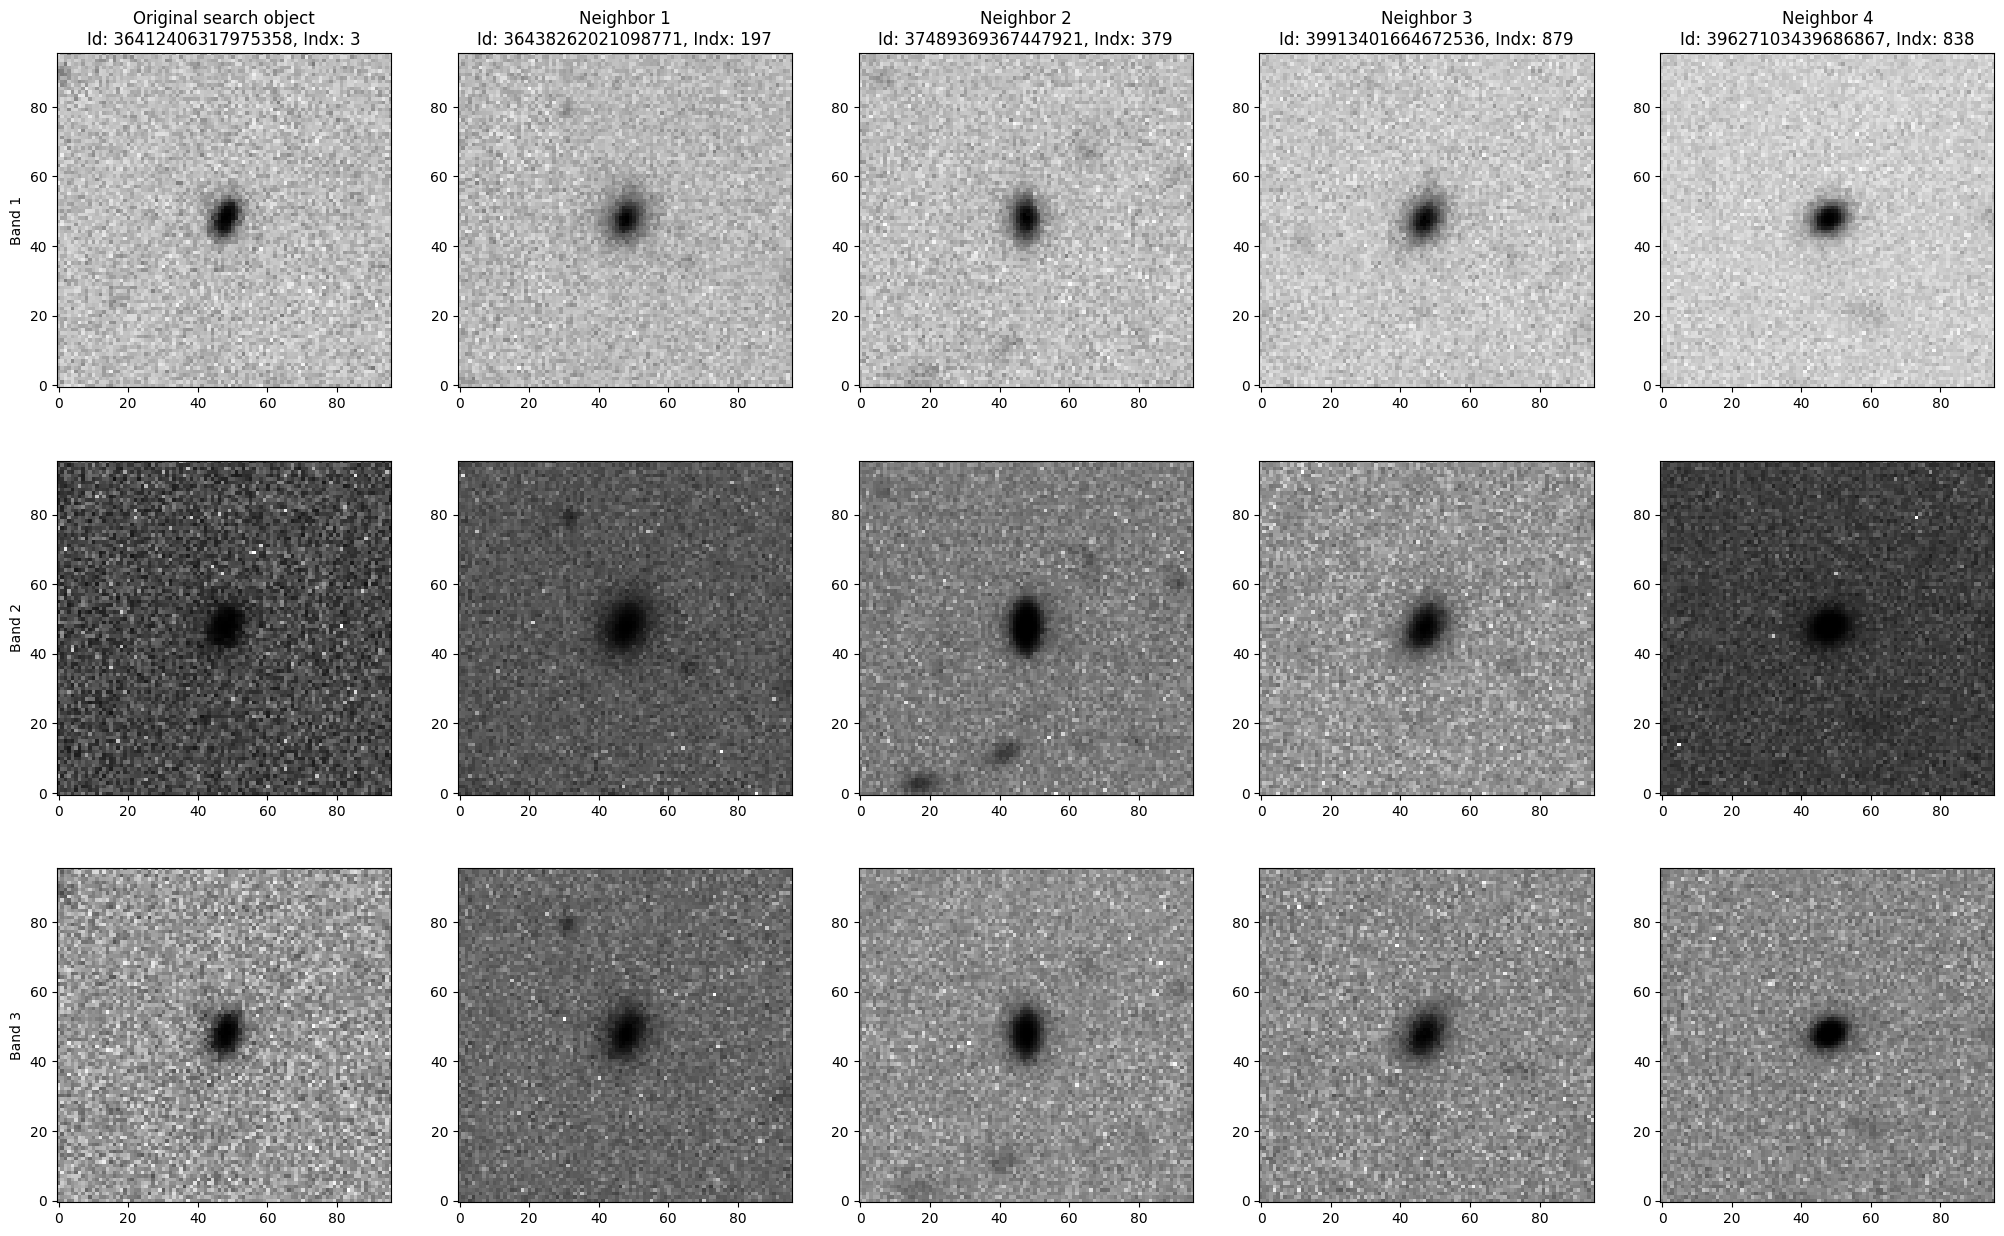

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, axes = plt.subplots(3, 5, figsize=(25, 5 * 3))

for ni, r in enumerate(search_results[0]):
    indx = all_ids.index(r)  # Get the index of the object in the dataset
    data = hsc_dataset[indx].numpy()  # Retrieve the data for the object - a (3, 96, 96) numpy array
    data = (data - np.min(data)) / (np.max(data) - np.min(data))  # Normalize the data

    for i in range(3):
        axes[i, ni].imshow(data[i], origin="lower", norm=LogNorm(), cmap="Greys")

        if i == 0:
            if ni == 0:
                axes[i, ni].set_title(f"Original search object\nId: {search_object_id}, Indx: {indx}")
            else:
                axes[i, ni].set_title(f"Neighbor {ni}\nId: {r}, Indx: {indx}")

        if ni == 0:
            axes[i, ni].set_ylabel(f"Band {i + 1}")